### Esta celda inicia spark

In [3]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

sc = SparkContext("local[2]", "Twitter_Streaming")
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)
ssc.checkpoint( "file:///Users/Pepe/Desktop/Github/FinalBDNR/Files/checkpoint")

socket_stream = ssc.socketTextStream("localhost", 4040)
lines = socket_stream.window(10)

from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

(lines.flatMap( lambda text: text.split(" ")) 
  .map( lambda word: ( word.lower(), 1 ) )
  .reduceByKey( lambda a, b: a + b )
  .map( lambda rec: Tweet( rec[0], rec[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
  .limit(10).registerTempTable("tweets") ) )

ssc.start()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=Twitter_Streaming, master=local[2]) created by __init__ at <ipython-input-1-168da16bd6a7>:6 

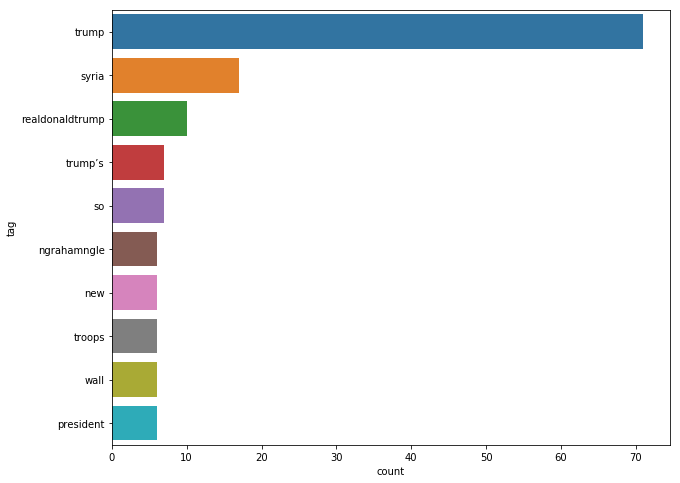

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import time
from IPython import display

count = 0
while count < 10:
    time.sleep(10)
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets  where count > 4' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sn.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

ssc.awaitTermination()

In [ ]:
df = sqlContext.sql("SELECT * FROM tweets")
df.show()

In [ ]:
ssc.stop()